In [41]:
import os
# Dataset location
# Adjust to point to root of dataset
dataset_root = "X:\hirise-map-proj"

In [5]:
# Dataset: 10.5281/zenodo.1048301
from marsvision.utilities import DataUtility
data_loader = DataUtility(os.path.join(dataset_root, "map-proj"))

## Cross Validation - Multi Class Classification With Random Forest

The classes in the Deep Mars dataset are as follows:

0: Other

1: Crater

2: Dark Dune

3: Streak

4: Bright Dune

5: Impact

6: Edge

In [35]:
from sklearn.ensemble import RandomForestClassifier
from marsvision.pipeline import Model
from marsvision.vision import DeepMarsDataset
import cv2
deepmars = DeepMarsDataset(dataset_root)
x = [cv2.imread(os.path.join(dataset_root, "map-proj", sample["filename"])) for sample in deepmars]
y = [sample["label"] for sample in deepmars]
random_forest = RandomForestClassifier(n_estimators = 500)
model = Model(random_forest, "sklearn", 
              training_images = x,
              training_labels = y)

c:\users\dpale\desktop\projects\marsvision\marsvision\pipeline\Model.py:57: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if "training_labels" in kwargs:


In [123]:
model.training_labels = y
multiclass_cv = model.cross_validate(5, ["accuracy"])

In [124]:
model.cv_results

{'fit_time': array([2.7130332 , 2.71749759, 2.69496751, 2.69903326, 2.73203182]),
 'score_time': array([0.10349703, 0.10100007, 0.11099958, 0.10350037, 0.10346794]),
 'test_accuracy': array([0.76701571, 0.7604712 , 0.7591623 , 0.73691099, 0.7604712 ])}

## Baseline CV Accuracy - All Classes (Mean from 5 Folds): ~75%

It's worth noting that accuracy is likely due to the imbalance of the "Other" and "Edge" classes.

## Cross Validation Results - Per-Class Binary Classification
### "Other" Class

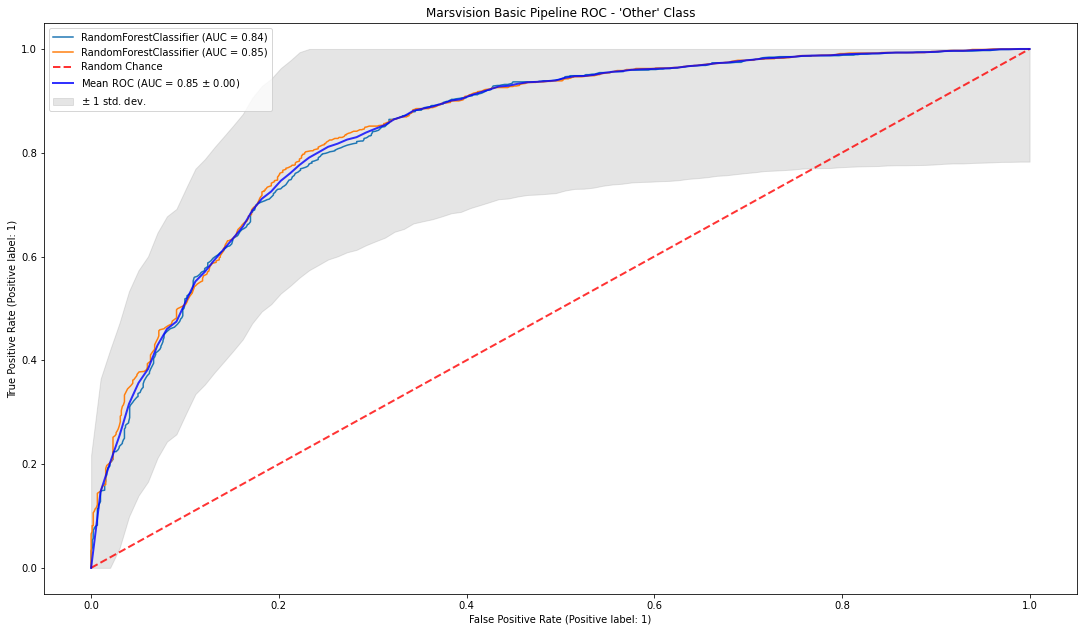

In [96]:
model.training_images = x
model.training_labels = [1 if label == 0 else 0 for label in y]
other_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Other' Class")

## Cross Validation Results - Per-Class Binary Classification
### "Crater" Class

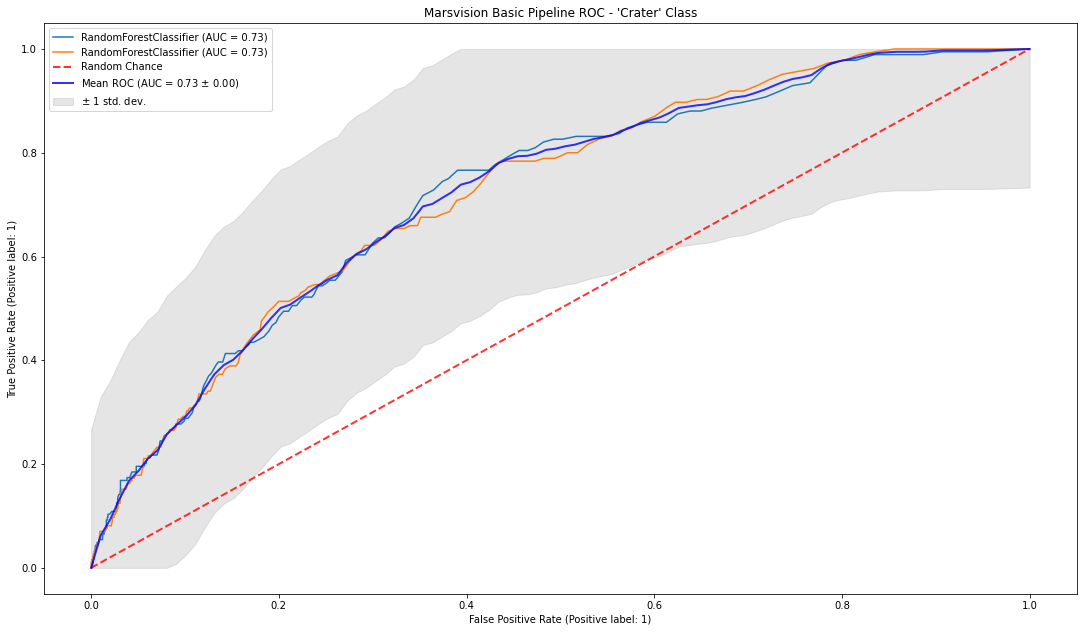

In [97]:
model.training_images = x
model.training_labels = [1 if label == 1 else 0 for label in y]
crater_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Crater' Class")

## Cross Validation Results - Per-Class Binary Classification
### "Dark Dune" Class

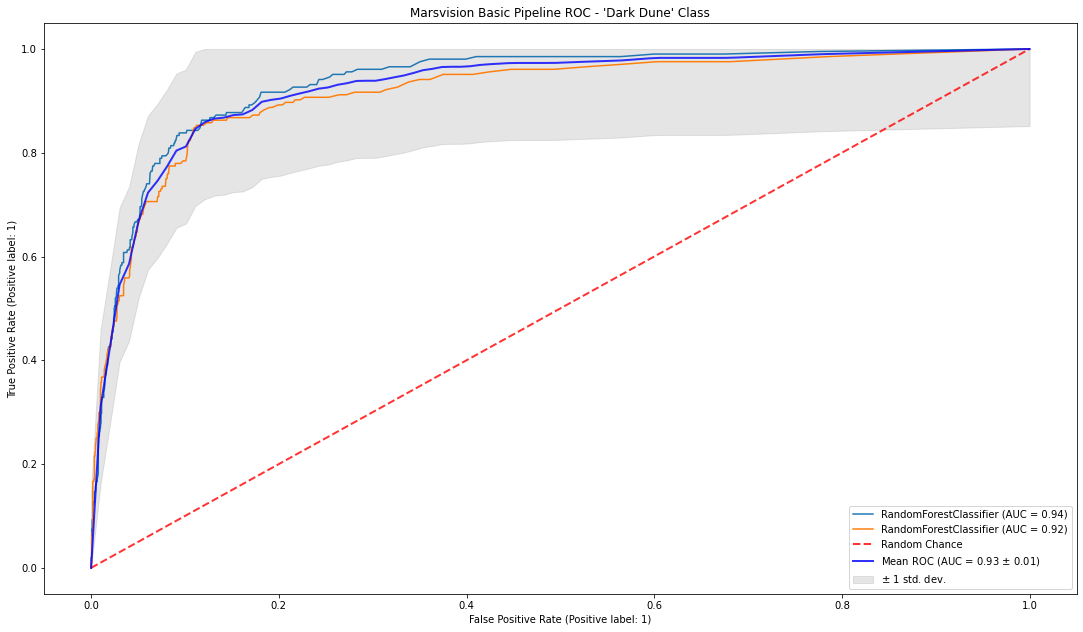

In [104]:
model.training_images = x
model.training_labels = [1 if label == 2 else 0 for label in y]
dark_dune_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Dark Dune' Class")

## Cross Validation Results - Per-Class Binary Classification
### "Streak" Class

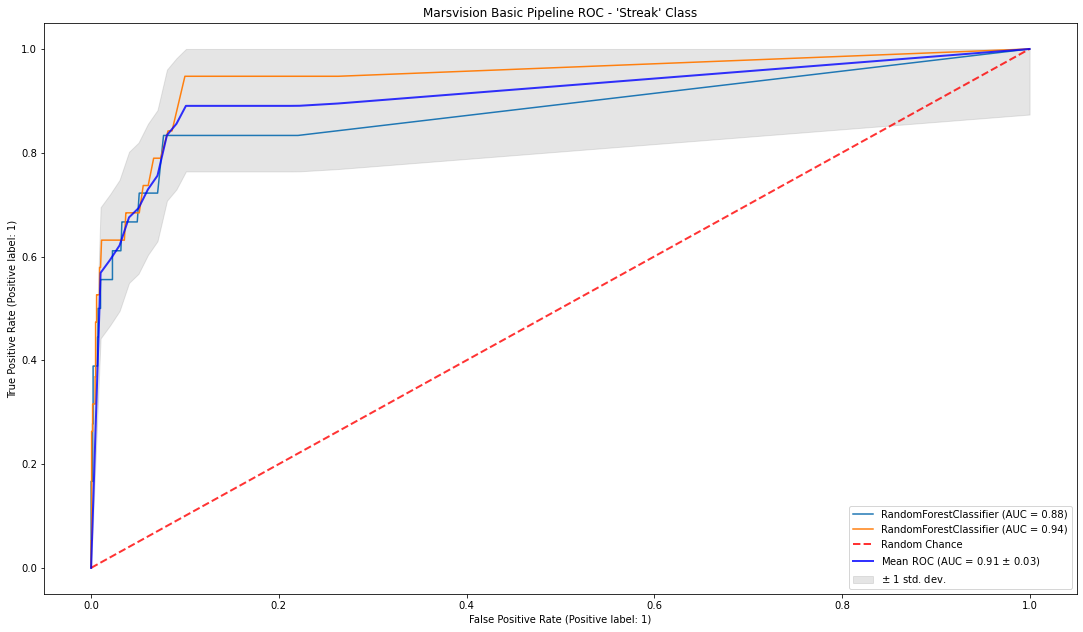

In [105]:
model.training_images = x
model.training_labels = [1 if label == 3 else 0 for label in y]
streak_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Streak' Class")

## Cross Validation Results - Per-Class Binary Classification
### "Bright Dune" Class

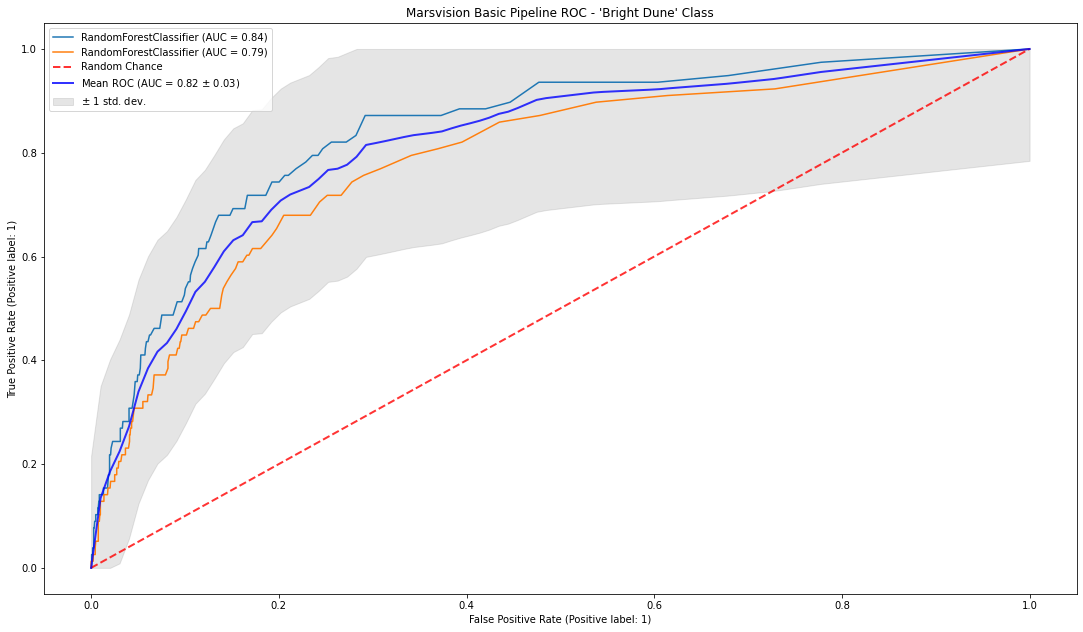

In [100]:
model.training_images = x
model.training_labels = [1 if label == 4 else 0 for label in y]
bright_dune_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Bright Dune' Class")

## Cross Validation Results - Per-Class Binary Classification
### "Edge" Class

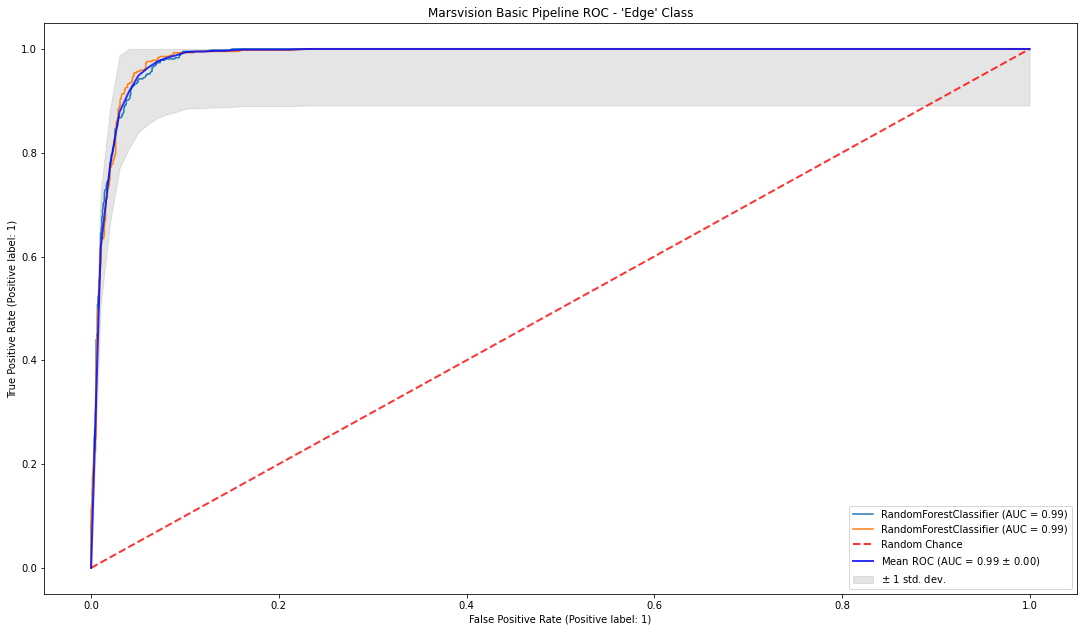

In [101]:
model.training_images = x
model.training_labels = [1 if label == 6 else 0 for label in y]
edge_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Edge' Class")

In [92]:
np.unique(y)

array([0, 1, 2, 3, 4, 6])

## Note on the "Impact Class":
There are no samples with this class (impact, class code = 5). Therefore, we cannot train and test for this class.

# Class Frequency
Show histogram of classes to give us an idea of class distributions.

In [ ]:
import seaborn as sns
ax = sns.displot(df_labelled, x="class_code", aspect=1.5)
ax.set(xticks=range(7), title="Deep Mars Class Counts")
ax.set_xticklabels(["Other", "Crater", "Dark Dune", "Streak", "Bright Dune", "Impact", "Edge"])

In [34]:
df_labelled["class_code"].value_counts()

0    2018
6     832
2     408
1     369
4     156
3      37
Name: class_code, dtype: int64

# Comparing Cross Validation Results Per-Class

These are scores for a Random Forest classifier on each class treated as a binary prediction.

In [106]:
import numpy as np
results_df = pd.DataFrame(data={
    "class_name": ["Other", "Crater", "Dark Dune", "Streak", "Bright Dune", "Edge"],
    "mean_precision": [
        np.mean(other_cv_results["precisions"]),
        np.mean(crater_cv_results["precisions"]),
        np.mean(streak_cv_results["precisions"]),
        np.mean(dark_dune_cv_results["precisions"]),
        np.mean(bright_dune_cv_results["precisions"]),
        np.mean(edge_cv_results["precisions"])
    ],
    "mean_recall": [
        np.mean(other_cv_results["recalls"]),
        np.mean(crater_cv_results["recalls"]),
        np.mean(streak_cv_results["recalls"]),
        np.mean(dark_dune_cv_results["recalls"]),
        np.mean(bright_dune_cv_results["recalls"]),
        np.mean(edge_cv_results["recalls"])
    ],
    "mean_auc": [
        other_cv_results["mean_auc"],
        crater_cv_results["mean_auc"],
        streak_cv_results["mean_auc"],
        dark_dune_cv_results["mean_auc"],
        bright_dune_cv_results["mean_auc"],
        edge_cv_results["mean_auc"]
    ],
    "mean_acc": [
        other_cv_results["acc_mean"],
        crater_cv_results["acc_mean"],
        streak_cv_results["acc_mean"],
        dark_dune_cv_results["acc_mean"],
        bright_dune_cv_results["acc_mean"],
        edge_cv_results["acc_mean"]]
})



In [107]:
results_df

,class_name,mean_precision,mean_recall,mean_auc,mean_acc
0,Other,0.769685,0.828048,0.847253,0.778272
1,Crater,0.447436,0.051439,0.725664,0.902094
2,Dark Dune,0.712500,0.244152,0.912499,0.991623
3,Streak,0.705453,0.475490,0.926596,0.922775
4,Bright Dune,0.342857,0.038462,0.815437,0.957330
5,Edge,0.873047,0.907452,0.985373,0.951047


Text(0.5, 1.0, 'Random Forest | Basic Pipeline Average Precision | 5 Fold CV')

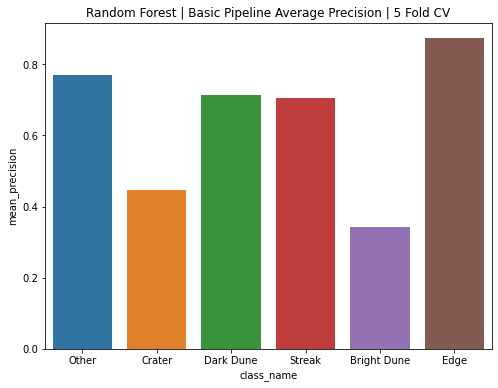

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="class_name", y="mean_precision",
                data=results_df)
ax.set_title("Random Forest | Basic Pipeline Average Precision | 5 Fold CV")

Text(0.5, 1.0, 'Basic Pipeline Average Recall | 5 Fold CV')

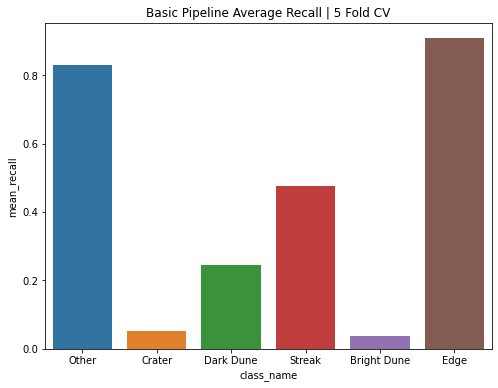

In [126]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="class_name", y="mean_recall",
                data=results_df)
ax.set_title("Basic Pipeline Average Recall | 5 Fold CV")

Text(0.5, 1.0, 'Random Forest |Basic Pipeline Average AUC | 5 Fold CV')

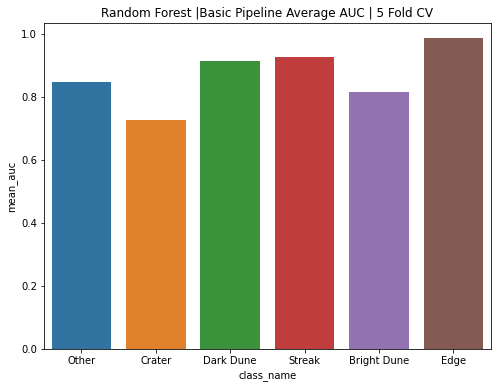

In [111]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="class_name", y="mean_auc",
                data=results_df)
ax.set_title("Random Forest |Basic Pipeline Average AUC | 5 Fold CV")

Text(0.5, 1.0, 'Random Forest | Basic Pipeline Average Accuracy | 5 Fold CV')

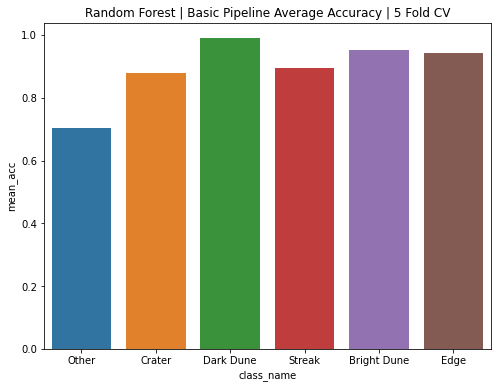

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="class_name", y="mean_acc",
                data=results_df)
ax.set_title("Random Forest | Basic Pipeline Average Accuracy | 5 Fold CV")


The baseline does well identifying the "other" class, which in our dataset means not an object. It did poorly on the Crater and Bright Dune classes, and somewhat better on the Streak and Dark Dune classes as we'd expect. Across the board we have poor recall, which means that this baseline random forest model would not do well in detecting new surface features.